In [1]:
# Practical 6 : Cricket Injury Impact Analysis

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
# ---------------------------------------------------------------
# Step 1: Create a large synthetic cricket dataset (450+ entries)
# ---------------------------------------------------------------

np.random.seed(123)

players = [f"Player_{i}" for i in range(1, 51)]
teams = ["MI", "CSK", "RCB", "KKR", "RR", "SRH"]
seasons = [2018, 2019, 2020, 2021, 2022, 2023]

records = 480

data = {
    "Player": np.random.choice(players, records),
    "Team": np.random.choice(teams, records),
    "Season": np.random.choice(seasons, records),
    "Matches_Played": np.random.randint(5, 18, records),
    "Runs": np.random.randint(0, 700, records),
    "Balls_Faced": np.random.randint(20, 600, records),
    "Team_Win_Perc": np.random.randint(30, 90, records),   # Team contribution factor
    "Injured": np.random.choice([0,1], records, p=[0.75, 0.25]), # 25% injury rate
    "Games_Missed": np.random.randint(0,10, records)
}

df = pd.DataFrame(data)



In [4]:
df.shape

(480, 9)

In [5]:
df.head()

,Player,Team,Season,Matches_Played,Runs,Balls_Faced,Team_Win_Perc,Injured,Games_Missed
0,Player_46,CSK,2023,8,577,48,59,0,7
1,Player_3,SRH,2019,17,487,457,32,0,6
2,Player_29,MI,2021,9,114,510,84,0,0
3,Player_35,MI,2021,10,54,442,51,0,0
4,Player_39,RCB,2023,11,73,29,58,0,0


In [9]:
# ---------------------------------------------------------------
# Step 3: Compare injured vs non-injured seasons
# ---------------------------------------------------------------

injury_compare = df.groupby("Injured").agg({
    "Run_Change": "mean",
    "SR_Change": "mean",
    "Win_Change": "mean"
}).reset_index()

injury_compare["Injured"] = injury_compare["Injured"].map({0:"No Injury",1:"Injured"})

print("\n📊 Average performance change after injury vs no injury:")
print(injury_compare)


📊 Average performance change after injury vs no injury:
     Injured  Run_Change  SR_Change  Win_Change
0  No Injury   -5.074074  11.637683   -0.129630
1    Injured   24.613208 -47.146759    3.443396


In [10]:
# ---------------------------------------------------------------
# Step 2: Performance metrics
# ---------------------------------------------------------------

# Basic strike rate
df["Strike_Rate"] = (df["Runs"] / df["Balls_Faced"]) * 100

# Dummy injury impact metric: Post-injury season performance
# Shift data by one row per player (previous season comparison)
df = df.sort_values(by=["Player","Season"])
df["Prev_Runs"] = df.groupby("Player")["Runs"].shift(1)
df["Prev_SR"] = df.groupby("Player")["Strike_Rate"].shift(1)
df["Prev_Win"] = df.groupby("Player")["Team_Win_Perc"].shift(1)

# Performance change after injury
df["Run_Change"] = df["Runs"] - df["Prev_Runs"]
df["SR_Change"] = df["Strike_Rate"] - df["Prev_SR"]
df["Win_Change"] = df["Team_Win_Perc"] - df["Prev_Win"]

print("\n✅ Sample dataset with injury + performance metrics:")
print(df.head())



✅ Sample dataset with injury + performance metrics:
       Player Team  Season  Matches_Played  Runs  Balls_Faced  Team_Win_Perc  \
50   Player_1  KKR    2018              12   372          421             84   
316  Player_1  KKR    2020              15   409          476             48   
358  Player_1  CSK    2020               8   515          593             32   
439  Player_1  SRH    2020               7   529          439             51   
129  Player_1   RR    2021              12   322           98             65   

     Injured  Games_Missed  Strike_Rate  Prev_Runs     Prev_SR  Prev_Win  \
50         0             3    88.361045        NaN         NaN       NaN   
316        1             8    85.924370      372.0   88.361045      84.0   
358        1             9    86.846543      409.0   85.924370      48.0   
439        1             7   120.501139      515.0   86.846543      32.0   
129        0             0   328.571429      529.0  120.501139      51.0   

     Run_

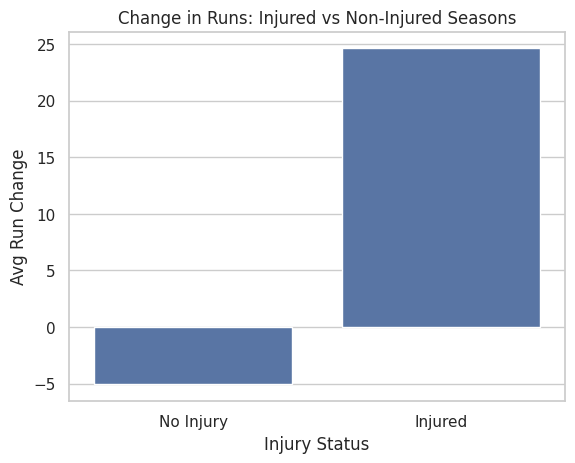

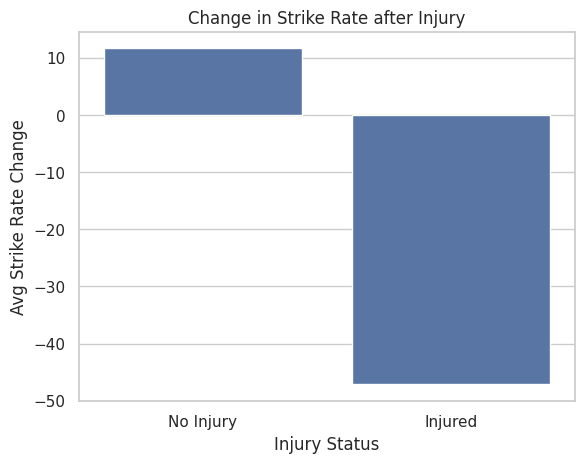

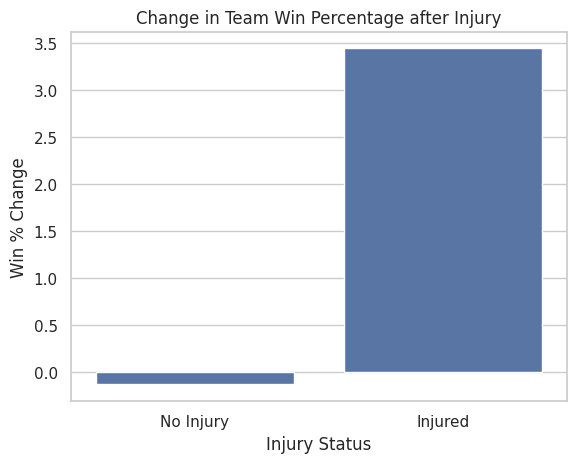

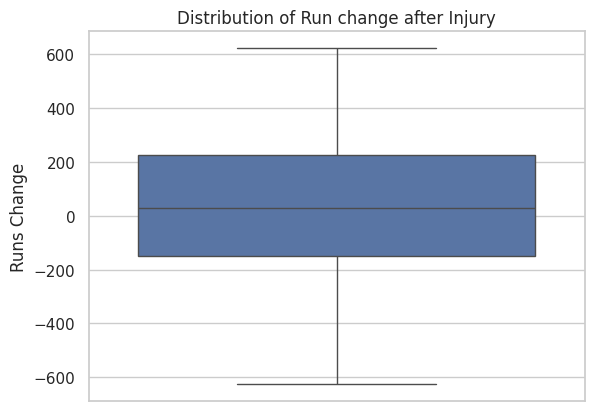

In [11]:
#---------------------------------------------------------------
# Step 4: Visual Analysis
# ---------------------------------------------------------------

# Visual: Runs change after injury
plt.figure()
sns.barplot(data=injury_compare, x="Injured", y="Run_Change")
plt.title("Change in Runs: Injured vs Non-Injured Seasons")
plt.xlabel("Injury Status")
plt.ylabel("Avg Run Change")
plt.show()

# Visual: Strike rate change after injury
plt.figure()
sns.barplot(data=injury_compare, x="Injured", y="SR_Change")
plt.title("Change in Strike Rate after Injury")
plt.xlabel("Injury Status")
plt.ylabel("Avg Strike Rate Change")
plt.show()

# Visual: Team performance change post-injury
plt.figure()
sns.barplot(data=injury_compare, x="Injured", y="Win_Change")
plt.title("Change in Team Win Percentage after Injury")
plt.xlabel("Injury Status")
plt.ylabel("Win % Change")
plt.show()

# Boxplot: Distribution of player decline
plt.figure()
sns.boxplot(data=df[df["Injured"]==1], y="Run_Change")
plt.title("Distribution of Run change after Injury")
plt.ylabel("Runs Change")
plt.show()

In [12]:
# ---------------------------------------------------------------
# Step 5: Trend insight — players who decline most
# ---------------------------------------------------------------

worst_decline = df[df["Injured"]==1].sort_values(by="Run_Change").head(5)
print("\n⚠️ Players with highest performance decline after injury:")
print(worst_decline[["Player","Season","Run_Change","SR_Change","Win_Change"]])


⚠️ Players with highest performance decline after injury:
        Player  Season  Run_Change   SR_Change  Win_Change
74   Player_38    2022      -626.0 -380.477112        31.0
402   Player_4    2020      -530.0 -130.690320        -1.0
14   Player_33    2020      -525.0 -161.077818        -5.0
42   Player_28    2020      -517.0 -171.999586        -2.0
396  Player_47    2023      -458.0  -98.276194       -21.0
